<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [17]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from datetime import datetime

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [18]:
df_customers = pd.read_csv(r"D:\data_docs\OPC\P9\Data\customers.csv", sep=";")
df_products = pd.read_csv(r"D:\data_docs\OPC\P9\Data\products.csv", sep=";")
df_transactions = pd.read_csv(r"D:\data_docs\OPC\P9\Data\Transactions.csv", sep=";")

C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_3908\961746287.py:3: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transactions = pd.read_csv(r"D:\data_docs\OPC\P9\Data\Transactions.csv", sep=";")


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

In [19]:
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8616,c_7920,m,1956
8617,c_7403,f,1970
8618,c_5119,m,1974
8619,c_5643,f,1968


In [20]:
current_year = datetime.now().year
df_customers['age'] = current_year - df_customers['birth']
del df_customers['birth']

In [21]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   age        8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [22]:
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


In [23]:
df_transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
1048570,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN


In [24]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [25]:
df_transactions.dropna(how='all', inplace=True)
df_transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


In [26]:
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

In [27]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 26.2+ MB


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse des données</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Évolution du chiffre d'affaires</h3>
</div>

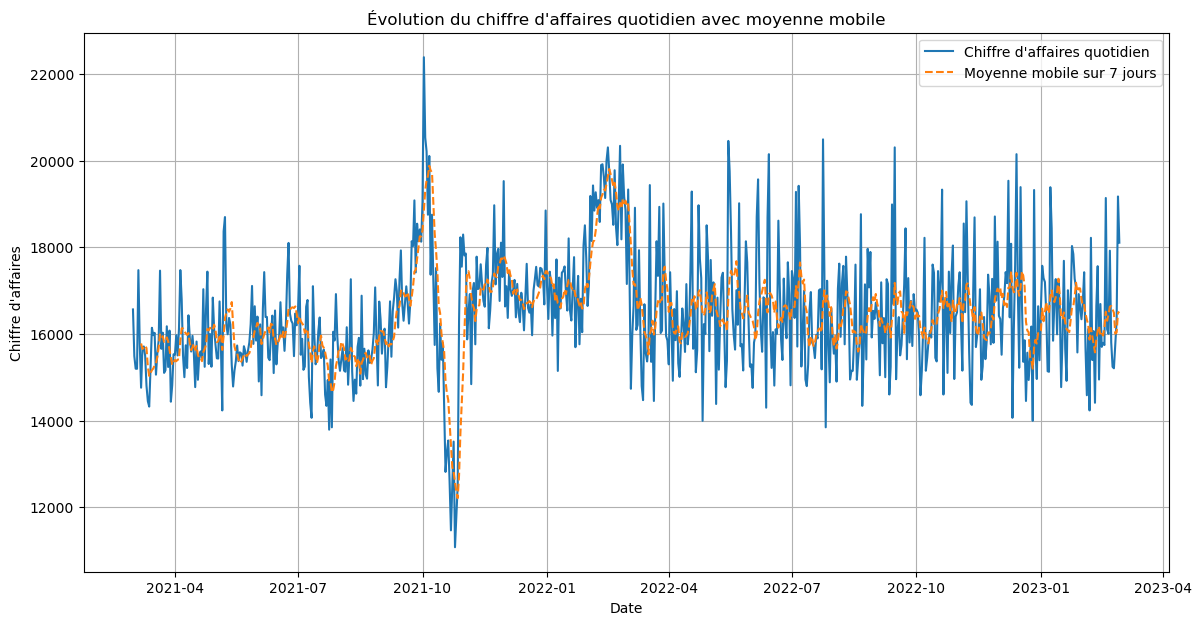

In [28]:
# Fusionner transactions avec produits pour obtenir les prix
df_transactions = df_transactions.merge(df_products, on='id_prod')

# Calculer le chiffre d'affaires par jour et ajouter une moyenne mobile
daily_revenue = df_transactions.groupby(df_transactions['date'].dt.date)['price'].sum()
daily_revenue = daily_revenue.to_frame(name='daily_revenue')
daily_revenue['7d_moving_avg'] = daily_revenue['daily_revenue'].rolling(window=7).mean()

# Tracer le graphique
plt.figure(figsize=(14, 7))
plt.plot(daily_revenue.index, daily_revenue['daily_revenue'], label="Chiffre d'affaires quotidien")
plt.plot(daily_revenue.index, daily_revenue['7d_moving_avg'], label='Moyenne mobile sur 7 jours', linestyle='--')
plt.title("Évolution du chiffre d'affaires quotidien avec moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
daily_revenue

,daily_revenue,7d_moving_avg
date,,
2021-03-01,16565.22,NaN
2021-03-02,15486.45,NaN
2021-03-03,15198.69,NaN
2021-03-04,15196.07,NaN
2021-03-05,17471.37,NaN
...,...,...
2023-02-24,15207.89,16488.778571
2023-02-25,15761.25,16006.747143
2023-02-26,16304.72,16035.021429


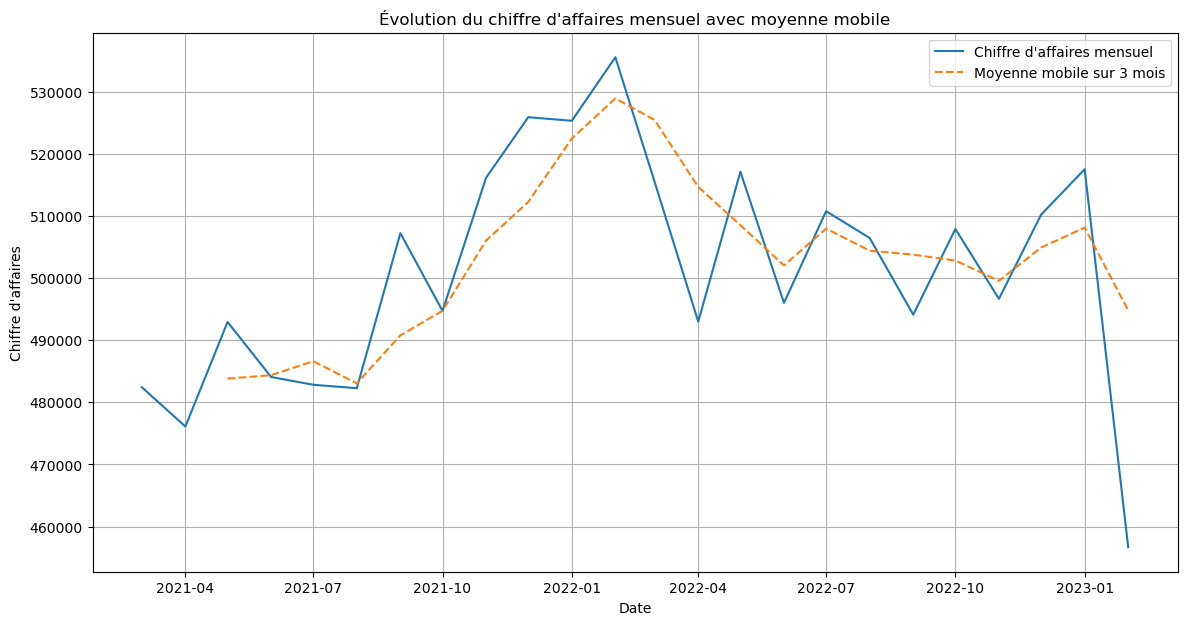

In [30]:
# Calculer le chiffre d'affaires par mois
monthly_revenue = df_transactions.groupby(df_transactions['date'].dt.to_period("M"))['price'].sum()

# Convertir l'index pour un affichage correct
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# Calculer la moyenne mobile sur 3 mois (par exemple)
monthly_revenue_moving_avg = monthly_revenue.rolling(window=3).mean()

# Tracer le graphique
plt.figure(figsize=(14, 7))
plt.plot(monthly_revenue.index, monthly_revenue, label="Chiffre d'affaires mensuel")
plt.plot(monthly_revenue.index, monthly_revenue_moving_avg, label='Moyenne mobile sur 3 mois', linestyle='--')
plt.title("Évolution du chiffre d'affaires mensuel avec moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Chiffre d'affaires par catégorie</h3>
</div>

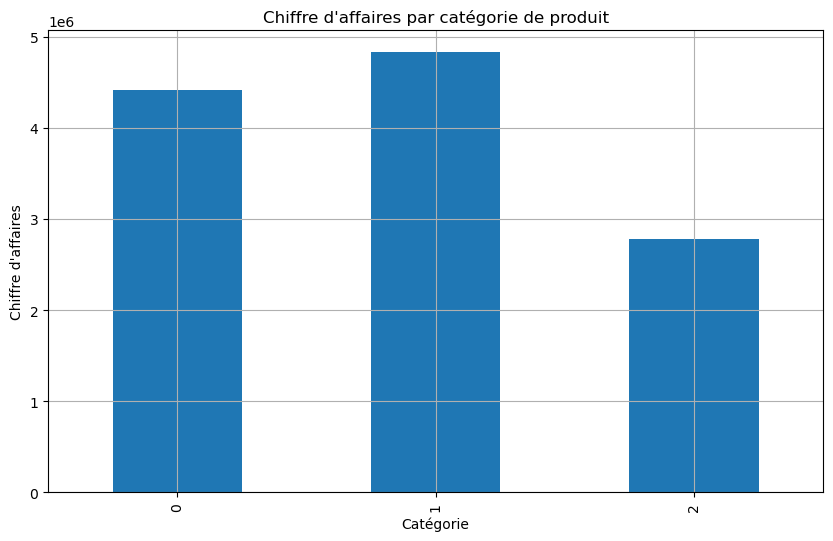

In [31]:
# Calculer le chiffre d'affaires par catégorie de produit
revenue_by_category = df_transactions.groupby('categ')['price'].sum()

# Tracer le graphique
plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar')
plt.title("Chiffre d'affaires par catégorie de produit")
plt.xlabel("Catégorie")
plt.ylabel("Chiffre d'affaires")
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - Nombre de clients par mois</h3>
</div>

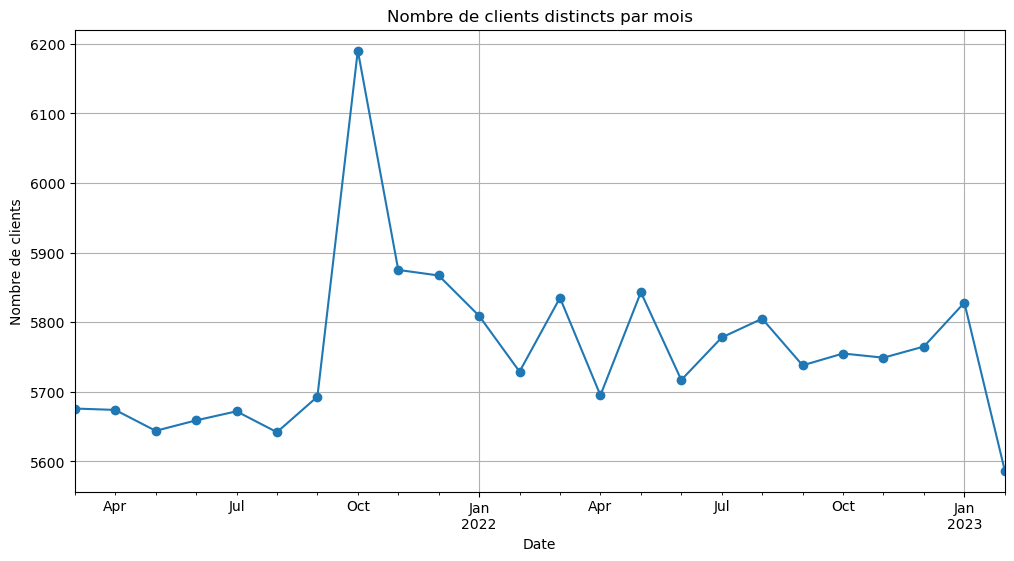

In [32]:
# Calculer le nombre de clients distincts par mois
clients_per_month = df_transactions.groupby(df_transactions['date'].dt.to_period("M"))['client_id'].nunique()

# Convertir l'index pour un affichage correct
clients_per_month.index = clients_per_month.index.to_timestamp()

# Tracer le graphique
plt.figure(figsize=(12, 6))
clients_per_month.plot(kind='line', marker='o')
plt.title("Nombre de clients distincts par mois")
plt.xlabel("Date")
plt.ylabel("Nombre de clients")
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4 - Nombre de transactions par mois</h3>
</div>

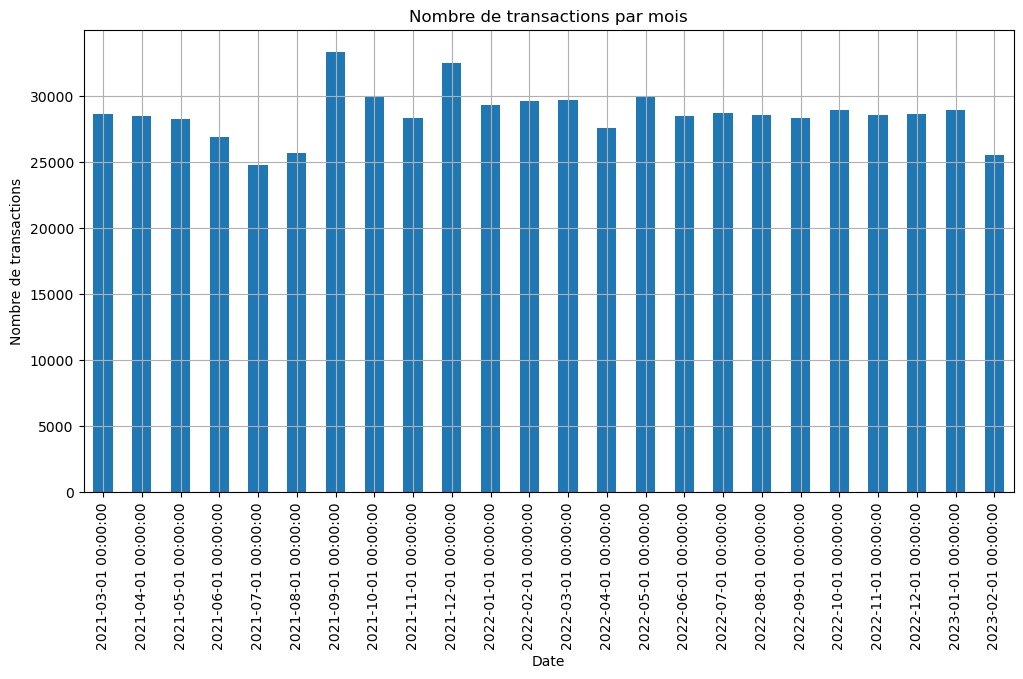

In [33]:
# Calculer le nombre de transactions par mois
transactions_per_month = df_transactions.groupby(df_transactions['date'].dt.to_period("M"))['session_id'].count()

# Convertir l'index pour un affichage correct
transactions_per_month.index = transactions_per_month.index.to_timestamp()

# Tracer le graphique
plt.figure(figsize=(12, 6))
transactions_per_month.plot(kind='bar')
plt.title("Nombre de transactions par mois")
plt.xlabel("Date")
plt.ylabel("Nombre de transactions")
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.5 - Nombre de produits vendus par mois</h3>
</div>

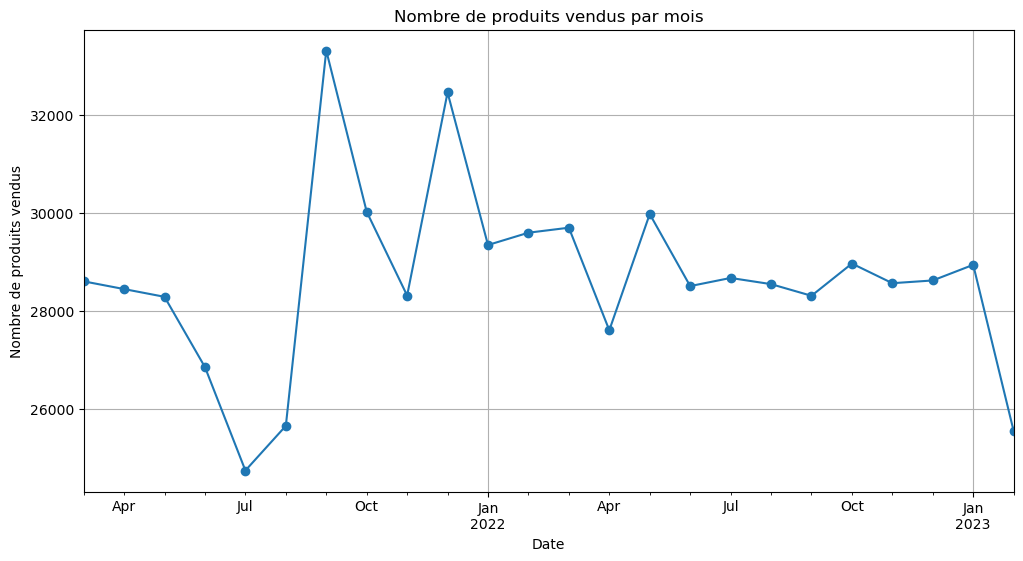

In [34]:
# Calculer le nombre de produits vendus par mois
products_sold_per_month = df_transactions.groupby(df_transactions['date'].dt.to_period("M"))['id_prod'].count()

# Convertir l'index pour un affichage correct
products_sold_per_month.index = products_sold_per_month.index.to_timestamp()

# Tracer le graphique
plt.figure(figsize=(12, 6))
products_sold_per_month.plot(kind='line', marker='o')
plt.title("Nombre de produits vendus par mois")
plt.xlabel("Date")
plt.ylabel("Nombre de produits vendus")
plt.grid(True)
plt.show()
